# Лабораторная работа №2

 ***Выполнили: Созинов Кирилл и Назаров Вячеслав, 19ПМИ-2.***

# I часть

Подключаем основные библиотеки:

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загружаем первый датасет:

In [117]:
df = pd.read_excel('C:/Users/ciril/Datasets/CCPP/Folds5x2_pp.xlsx')

In [12]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


Разделяем датасет на данные и таргет ($X$ и $y$)

In [118]:
X = df[["AT", "V", "AP", "RH"]]
y = df["PE"]

Далее скалируем данные

In [140]:
from sklearn import preprocessing

In [128]:
scaler = preprocessing.StandardScaler()
scaler

StandardScaler()

In [129]:
X_scaled=scaler.fit_transform(X)
X_scaled.mean(axis=0)

array([-1.84542088e-16, -1.92710953e-16,  5.47221131e-15, -3.37522652e-16])

Получаем следующие данные:

In [131]:
X = pd.DataFrame(X_scaled, columns=["AT","V","AP","RH"])
X

,AT,V,AP,RH
0,-0.629519,-0.987297,1.820488,-0.009519
1,0.741909,0.681045,1.141863,-0.974621
2,-1.951297,-1.173018,-0.185078,1.289840
3,0.162205,0.237203,-0.508393,0.228160
4,-1.185069,-1.322539,-0.678470,1.596699
...,...,...,...,...
9563,-0.402737,-0.363242,0.126450,1.211755
9564,-0.867037,-1.190331,1.753131,-0.447205
9565,1.565840,1.575811,-0.057099,-2.522618
9566,0.647976,1.191778,0.101191,-0.747901


Взглянем на описательные статистики:

In [230]:
X.describe()

,AT,V,AP,RH
count,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03
mean,-1.719813e-16,-2.600229e-16,5.504864e-15,-3.490855e-16
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-2.394126e+00,-2.277901e+00,-3.430019e+00,-3.270589e+00
25%,-8.240958e-01,-9.888705e-01,-7.003615e-01,-6.836860e-01
50%,9.309729e-02,-1.751604e-01,-5.373067e-02,1.141150e-01
75%,8.143721e-01,9.627745e-01,6.737290e-01,7.891378e-01
max,2.342804e+00,2.144779e+00,3.374760e+00,1.839173e+00


Отобразим признаки в виде гистограмм:

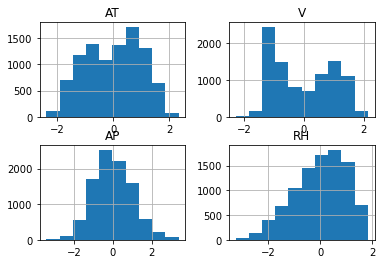

In [133]:
X.hist()
plt.show()

Распределение признаков приблизительно нормальное

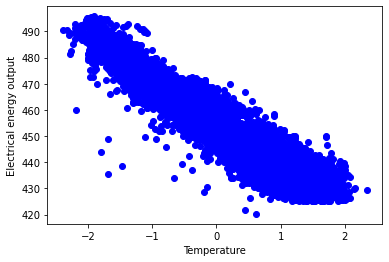

In [227]:
plt.scatter(X.AT, y , color="blue")
plt.xlabel("Temperature")
plt.ylabel("Electrical energy output")
plt.show()

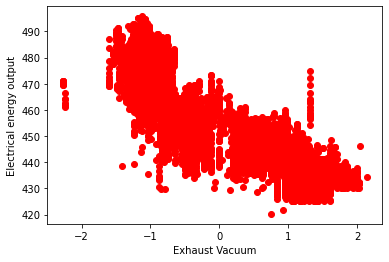

In [228]:
plt.scatter(X.V, y, color="red")
plt.xlabel("Exhaust Vacuum")
plt.ylabel("Electrical energy output")
plt.show()

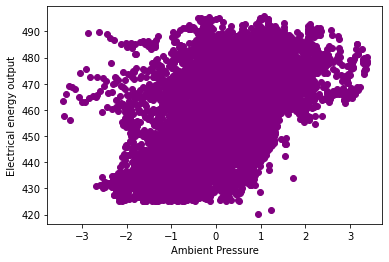

In [229]:
plt.scatter(X.AP, y, color="Purple")
plt.xlabel("Ambient Pressure")
plt.ylabel("Electrical energy output")
plt.show()

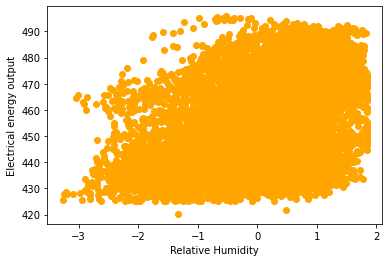

In [139]:
plt.scatter(X.RH, y, color="orange")
plt.xlabel("Relative Humidity")
plt.ylabel("Electrical energy output")
plt.show()

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Разбиваем выборку на обучающую и тестовую:

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
def quality(y, y_pred):
    print("MSE:", mean_squared_error(y, y_pred))
    print("RMSE:", mean_squared_error(y, y_pred)**(1/2))
    print("MAE:", mean_absolute_error(y, y_pred))
    print("R2:", r2_score(y, y_pred))

Строим модель полиномиальной регрессии и обучаем её:

In [248]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

Смотрим результаты:

In [247]:
quality(y_test, y_pred)

MSE: 22.1438728163628
RMSE: 4.705727660666605
MAE: 3.6421624612972407
R2: 0.9224963632788332


Значения коэффициентов следующие:

In [198]:
pol_reg.coef_

array([  0.        , -13.46941095,  -3.78891996,   0.71807186,
        -1.77674205,   0.89604077,   1.11795364,   0.14485984,
        -0.64870546,  -0.17305059,   0.18533304,   0.10673503,
        -0.27085745,  -0.26705424,  -0.37674281])

### Анализ коэффициентов регресии
- Коэффициент первого признака (**Temperature**) имеет наибольшее, но при этом отрицательное значение, т.е. с ростом температуры будет довольно значительно уменьшатся выработка энергии
- Второй признак(**Exhaust Vacuum**) является вторым по значимости, так же с отрицательным значением коэффициента
- Третий признак, а именно **Ambient Pressure** имеет уже положительный коэффициент, но его значение при этом мало.
- **Relative Humidity** имеет отрицательный коэффициент и небольшое значение.

Значение пересечения следующее:

In [190]:
pol_reg.intercept_

453.21169111078024

Построим аппроксимации:

In [199]:
def viz_polymonial(X_,name):
    plt.scatter(X_, y, color='red')
    plt.plot(X_, pol_reg.predict(poly_reg.fit_transform(X_)), color='blue')
    plt.xlabel(name)
    plt.ylabel('Electrical energy output')
    plt.show()
    return

In [203]:
X_AT = X.AT.values.reshape(-1,1)
X_V = X.V.values.reshape(-1,1)
X_AP = X.AP.values.reshape(-1,1)
X_RH = X.RH.values.reshape(-1,1)

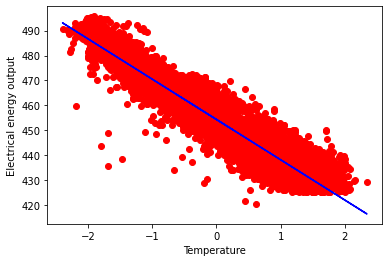

In [208]:
poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X_AT)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial(X_AT, "Temperature")

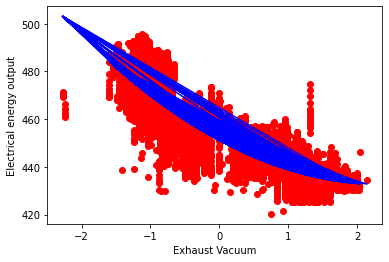

In [219]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_V)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial(X_V, "Exhaust Vacuum")

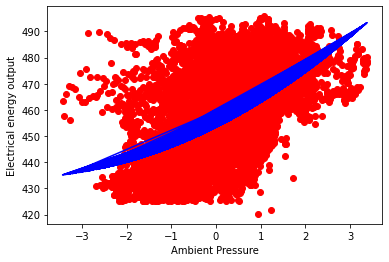

In [218]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_AP)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial(X_AP, "Ambient Pressure")

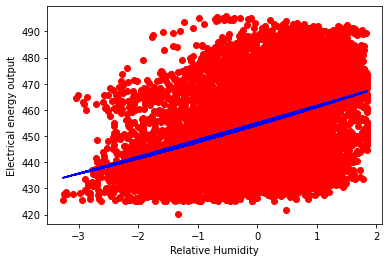

In [249]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_RH)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial(X_RH, "Relative Humidity")

## Ridge регрессия

In [234]:
from sklearn.linear_model import Ridge

In [320]:
def ridge_rg(alpha=0):
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    return [r2_score(y_test, y_pred), ridge.coef_]

In [321]:
ridge_rg(100)
quality(y_test, y_pred)

MSE: 19.249314409054367
RMSE: 4.387404062661013
MAE: 3.3458292095848323
R2: 0.9326273284053336


Коэффициенты для *Ridge* регрессии с параметром $\lambda = 100$ выглядят след. образом:

In [340]:
ridge.coef_

array([-13.90557519,  -3.49439323,   0.51523825,  -1.97520952])

В случае линейной регрессии, значение $R^2$ изменилось на примерно одну сотую, но в случае полиномиальной регрессии второй степени значения $R^2$ оказываются абсолютно равны. Коэффициенты регрессии незначительно отличаются.

Было выбрано значение $\lambda$ от $1$ до $505$ с шагом в $5$ для наглядности. Собираем матрицу:

In [366]:
alpha_arr = np.arange(1, 505, 5)
r2_arr = np.zeros(101)
c1_arr = np.zeros(101)
c2_arr = np.zeros(101)
c3_arr = np.zeros(101)
c4_arr = np.zeros(101)
k = 0
for i in alpha_arr:
    t = ridge_rg(i)
    r2_arr[k] = t[0]
    c1_arr[k] = t[1][0]
    c2_arr[k] = t[1][1]
    c3_arr[k] = t[1][2]
    c4_arr[k] = t[1][3]
    k+=1
res = np.stack((alpha_arr, r2_arr, c1_arr, c2_arr, c3_arr, c4_arr), axis=1)
rdf = pd.DataFrame(data=res)
rdf.columns = ['alpha', 'R2', 'c1', 'c2', 'c3', 'c4']
rdf

,alpha,R2,c1,c2,c3,c4
0,1.0,0.932627,-14.834357,-2.946595,0.312615,-2.314923
1,6.0,0.932627,-14.782195,-2.978037,0.323887,-2.295977
2,11.0,0.932627,-14.730653,-3.009032,0.335037,-2.277242
3,16.0,0.932627,-14.679720,-3.039589,0.346068,-2.258714
4,21.0,0.932627,-14.629386,-3.069715,0.356980,-2.240389
...,...,...,...,...,...,...
96,481.0,0.932627,-11.615964,-4.691302,1.034617,-1.111172
97,486.0,0.932627,-11.594362,-4.701135,1.039661,-1.102804
98,491.0,0.932627,-11.572912,-4.710864,1.044672,-1.094492
99,496.0,0.932627,-11.551614,-4.720491,1.049650,-1.086233


Как можем видеть, $R^2$ является в этом случае константным значением

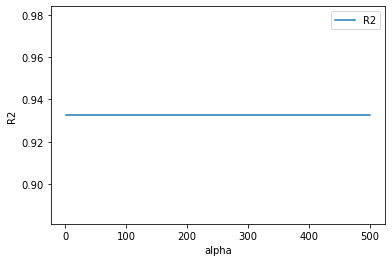

In [367]:
rdf.plot(x = 0, y = 1)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.show()

Зависимоcть коэффициентов выглядит след. образом:

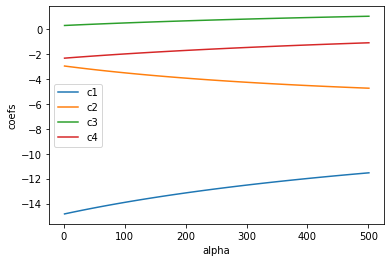

In [333]:
rdf.plot(x = 0, y = [2, 3, 4, 5])
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.show()

## Lasso регрессия

In [335]:
from sklearn.linear_model import Lasso

In [336]:
def lasso_rg(alpha=0):
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    return [r2_score(y_test, y_pred), lasso.coef_]

In [338]:
lasso_rg(10)
quality(y_test, y_pred)

MSE: 19.249314409054367
RMSE: 4.387404062661013
MAE: 3.3458292095848323
R2: 0.9326273284053336


$R^2$ опять не изменился

Коэффициенты для *Lasso* регрессии с параметром $\lambda = 10$ выглядят след. образом:

In [344]:
lasso.coef_

array([-6.23569382, -0.        ,  0.        ,  0.        ])

Как мы видим, все коэффициенты кроме первого обратились в ноль

В случае *Lasso* регресии были выбраны значения от $0.1$ до $20.1$ с шагом в $0.1$

In [362]:
alpha_arr = np.arange(0.1, 20.1, 0.1)
r2_arr = np.zeros(200)
c1_arr = np.zeros(200)
c2_arr = np.zeros(200)
c3_arr = np.zeros(200)
c4_arr = np.zeros(200)
k = 0
for i in alpha_arr:
    t = lasso_rg(i)
    r2_arr[k] = t[0]
    c1_arr[k] = t[1][0]
    c2_arr[k] = t[1][1]
    c3_arr[k] = t[1][2]
    c4_arr[k] = t[1][3]
    k+=1
res = np.stack((alpha_arr, r2_arr, c1_arr, c2_arr, c3_arr, c4_arr), axis=1)
rdf = pd.DataFrame(data=res)
rdf.columns = ['alpha', 'R2', 'c1', 'c2', 'c3', 'c4']
rdf

,alpha,R2,c1,c2,c3,c4
0,0.1,0.932627,-14.578434,-3.000272,0.298150,-2.090686
1,0.2,0.932627,-14.307598,-3.062932,0.286905,-1.861158
2,0.3,0.932627,-14.036754,-3.125598,0.275662,-1.631627
3,0.4,0.932627,-13.765900,-3.188269,0.264421,-1.402093
4,0.5,0.932627,-13.493938,-3.251605,0.253419,-1.172187
...,...,...,...,...,...,...
195,19.6,0.932627,-0.000000,-0.000000,0.000000,0.000000
196,19.7,0.932627,-0.000000,-0.000000,0.000000,0.000000
197,19.8,0.932627,-0.000000,-0.000000,0.000000,0.000000
198,19.9,0.932627,-0.000000,-0.000000,0.000000,0.000000


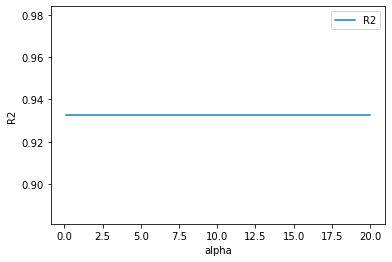

In [364]:
rdf.plot(x = 0, y = 1)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.show()

Значение $R^2$ опять осталось неизменным

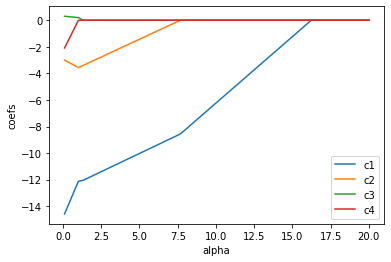

In [363]:
rdf.plot(x = 0, y = [2, 3, 4, 5])
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.show()

Благодаря графику мы можем наблюдать, на каких значениях все коэффициенты обратились в ноль.

# II часть задания

Импортируем библиотеки

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Масштабируем данные и разделяем Dataframe

In [374]:
data = pd.read_csv('C:/Users/ciril/Datasets/airfoil_self_noise.csv')
scale = StandardScaler()
X = data.drop('scaled_sound_pressure_level',axis='columns')
Y = data['scaled_sound_pressure_level']
X_scaled=scaler.fit_transform(X)
X = pd.DataFrame(X_scaled,columns=['Frequencys','AngleAttack','ChordLengh','FreeStreamVelocity','SuctionSide displacement...'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

Строим модель с линейной регрессией и получаем $R^2 = 0.44$

In [375]:
regression = LinearRegression()
regression.fit(X_train, Y_train)
y_pred=regression.predict(X_test)
r2_score(Y_test, y_pred)

0.4465805234416699

Теперь используем модель с полиномиальной регрессией, начиная с полинома 3-й степени и заканчивая 6-й

In [377]:
pl = PolynomialFeatures(3)
X_test_pl=pl.fit_transform(X_test)
X_train_pl=pl.fit_transform(X_train)
regression.fit(X_train_pl,Y_train)
Y_pred=regression.predict(X_test_pl)
print(r2_score(Y_test,Y_pred))

0.7277815410266057


In [378]:
pl = PolynomialFeatures(4)
X_test_pl=pl.fit_transform(X_test)
X_train_pl=pl.fit_transform(X_train)
regression.fit(X_train_pl,Y_train)
Y_pred=regression.predict(X_test_pl)
print(r2_score(Y_test,Y_pred))

0.8267883968989578


In [379]:
pl = PolynomialFeatures(5)
X_test_pl=pl.fit_transform(X_test)
X_train_pl=pl.fit_transform(X_train)
regression.fit(X_train_pl,Y_train)
Y_pred=regression.predict(X_test_pl)
print(r2_score(Y_test,Y_pred))

0.8500756480251013


In [380]:
pl = PolynomialFeatures(6)
X_test_pl=pl.fit_transform(X_test)
X_train_pl=pl.fit_transform(X_train)
regression.fit(X_train_pl,Y_train)
Y_pred=regression.predict(X_test_pl)
print(r2_score(Y_test,Y_pred))

-0.18068585573967644


Видно, что наибольший показатель $R^2$ получается с полиномом 5-й степени, равный $0.85$